## Imports and Dependencies

In [1]:
import r3d
import numpy as np
import open3d as o3d
import trimesh as tm
import pybullet as p

pybullet build time: Jun 12 2023 15:17:43


## Creating a scene with Ball and Plane (show plane, background, camera pose) 

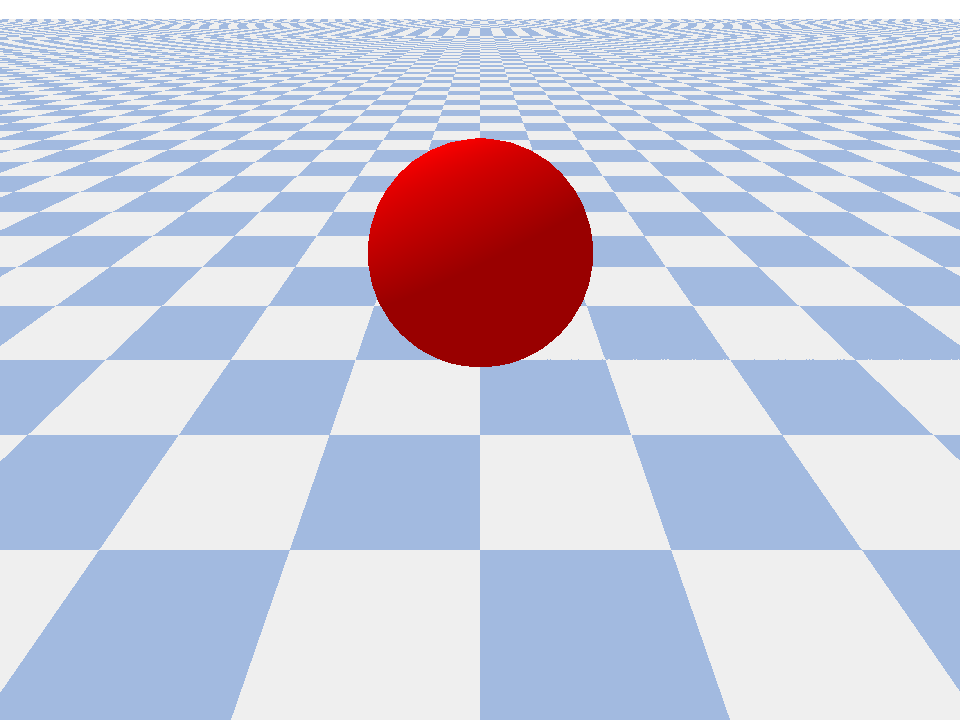

In [2]:
scene = r3d.Scene()
position = np.array([0, -3, 2])
sphere = r3d.create_sphere(position, 0.25) 
scene.add_body(sphere)
scene.render(r3d.pybullet_render) 

## Creating a scene with Ball and Cube (show orientation, position) 

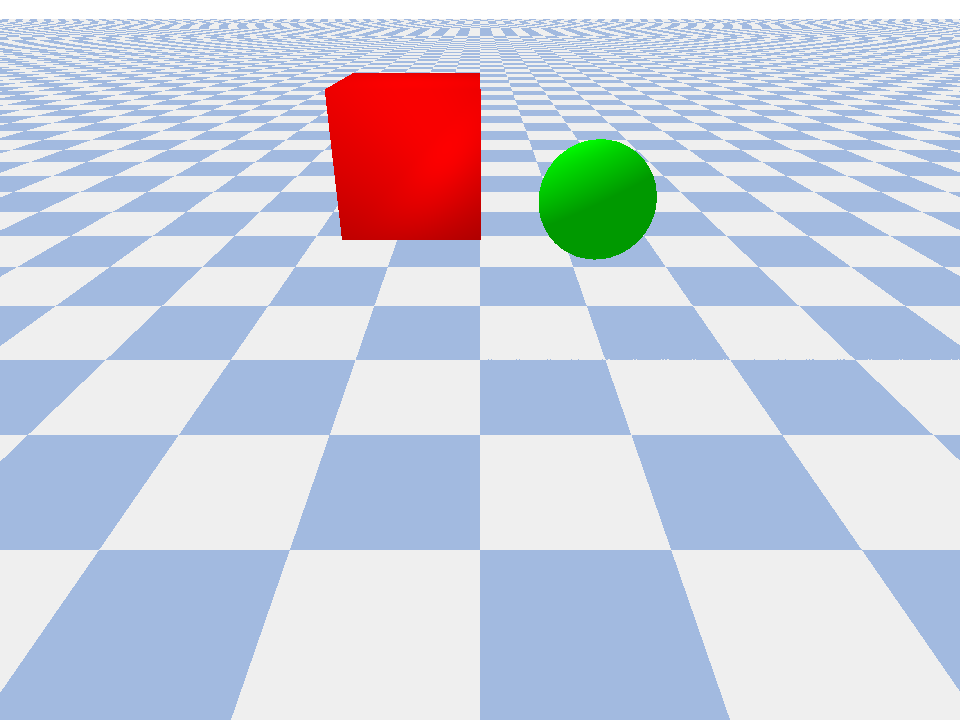

In [3]:
new_scene = r3d.Scene(id = "ball_and_cube")
sphere_position = np.array([1, 1, 1])
cube_position = np.array([0, 0, 1])
    
#have the cube rotated 45 degrees around the z axis
cube_orientation = np.array([[0, -1, 0],
                            [1, 0, 0],
                            [0, 0, 1]])

cube = r3d.create_box(cube_position, 1, 1, 1, cube_orientation, id = "test_cube")
big_sphere = r3d.create_sphere(sphere_position, 0.5, id = "test_sphere")
big_sphere.set_color([0,1,0])
new_scene.add_body(cube)
new_scene.add_body(big_sphere)
new_scene.render(r3d.pybullet_render)

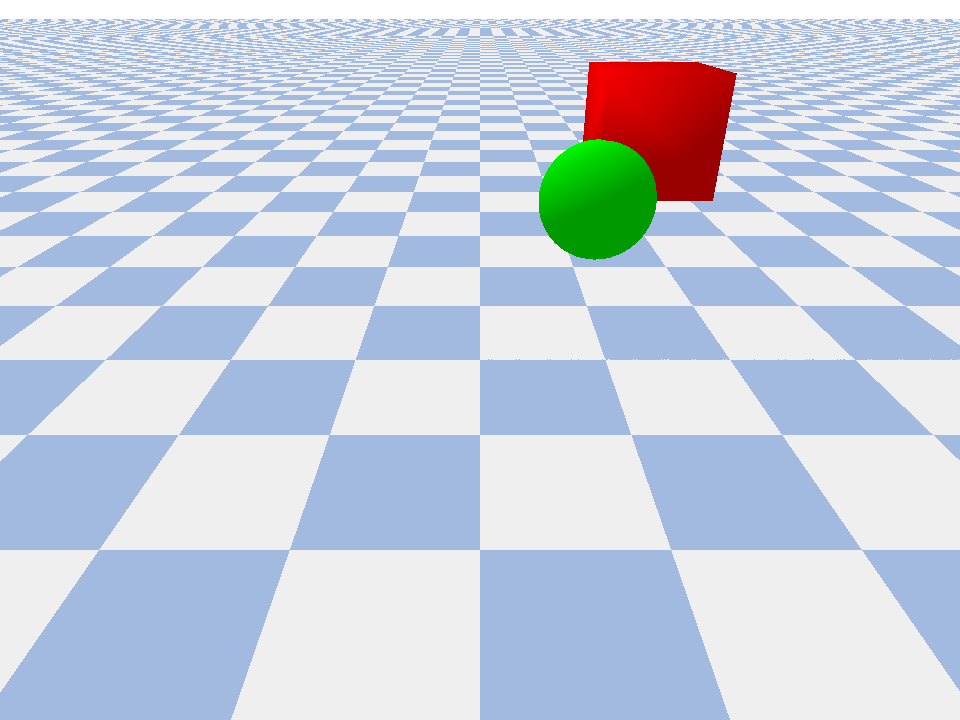

In [4]:
bodies = new_scene.get_bodies()
bodies["test_cube"].set_position(np.array([1, 1, 1]))
bodies["test_cube"].set_orientation(np.array([[1, 0, 0],
                                                [0, 1, 0],
                                                [0, 0, 1]]))

new_scene.render(r3d.pybullet_render)

## Creating a scene with custom mesh (custom mesh)

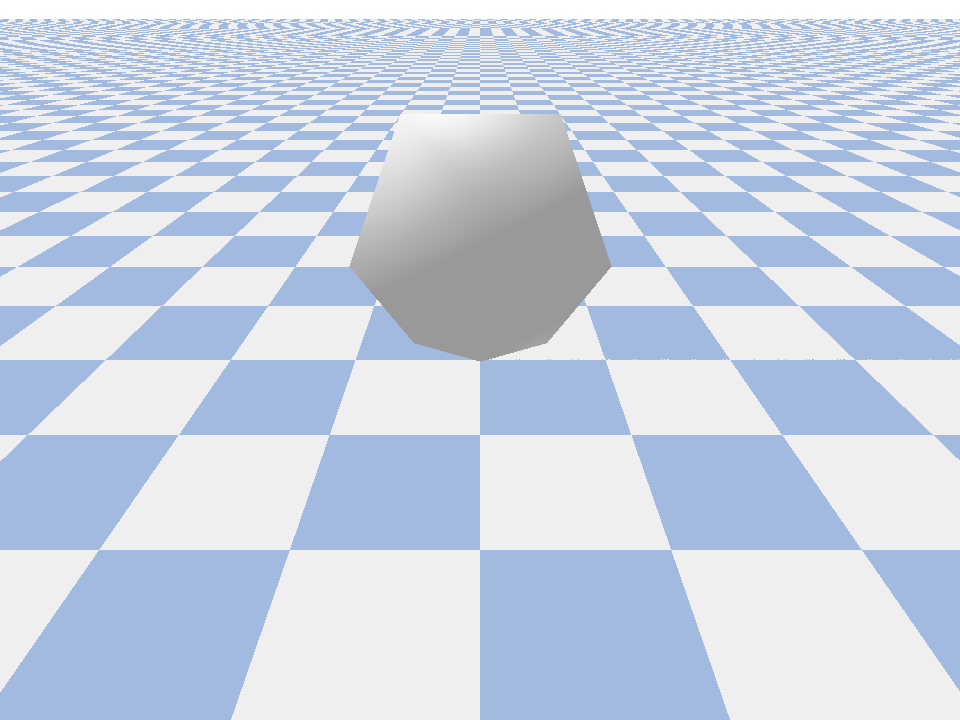

In [5]:
scene = r3d.Scene()
d20_position = np.array([0, 0, 1])
d20 = r3d.make_body_from_obj("icosahedron.obj", d20_position, id = "d20")
d20.set_color([1,1,1])
scene.add_body(d20)
scene.render(r3d.pybullet_render)

## Creating a scene with different transparency (alpha transparency)

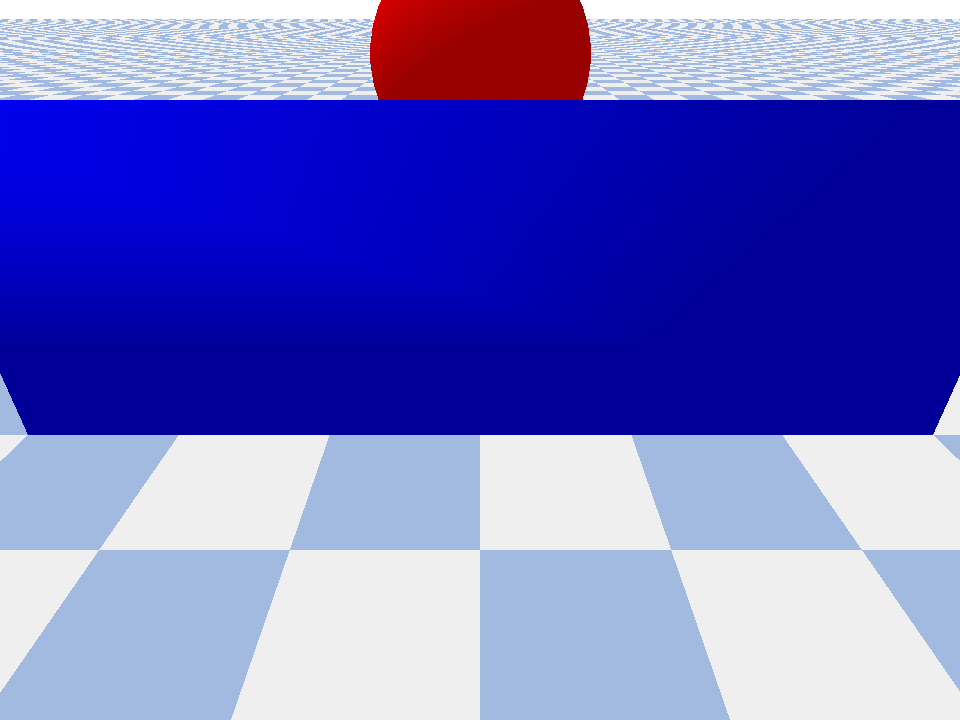

In [2]:
scene = r3d.Scene()
occluder = r3d.create_box(np.array([-3, -1, 0]), 6, 0.5, 2, id = "occluder")
ball = r3d.create_sphere(np.array([0, 2, 2]), 1, id = "ball")
occluder.set_transparency(0.1)
occluder.set_color([0, 0, 1])   
scene.add_bodies([occluder, ball])
scene.render(r3d.pybullet_render)

## Editing Scenes: Checking Objects in Scene, Removing Objects from Scene, 

{'occluder': <r3d.Body object at 0x2db2b0520>, 'ball': <r3d.Body object at 0x106916d30>}
Scene ID: scene
Bodies:
    Body ID: occluder, Position: [-3. -1.  0.]
    Body ID: ball, Position: [0. 2. 2.]


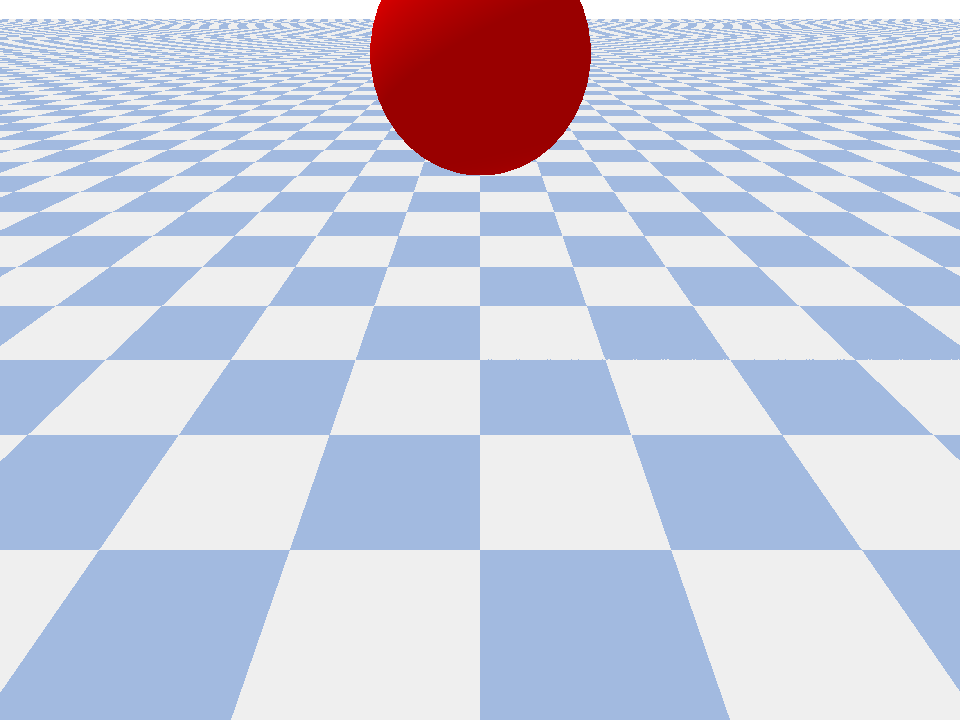

In [3]:
bodies = scene.get_bodies()
print(bodies)
print(scene) 
scene.remove_body("occluder")
scene.render(r3d.pybullet_render)

## Simple Simulation: Balls colliding (simulation, pybullet class, object poses)

In [4]:
scene = r3d.Scene()
sphere_position1 = [-2, 0, 1]
sphere_start_velocity1 = [15, 0, 0]
sphere_position2 = [2, 0, 1]
sphere_start_velocity2 = [-15, 0, 0]
sphere1 = r3d.create_sphere(sphere_position1, 0.5,id = "sphere1")
sphere1.set_velocity(sphere_start_velocity1)
sphere1.set_color([1,0,0])
sphere2 = r3d.create_sphere(sphere_position2, 0.5, "sphere2")
sphere2.set_velocity(sphere_start_velocity2)
scene.add_bodies([sphere1, sphere2])
pyb_sim = scene.simulate(60) 
pyb_sim.create_gif("sphere_collision.gif", 15)

## Simple Simulation: Balls Bouncing (restitution, gravity) 

In [7]:
scene = r3d.Scene()
sphere1 = r3d.create_sphere(np.array([0, 0, 3]), 0.5, id = "regular_ball")
sphere1.set_restitution(0.3)
sphere1.set_color([1,0,0])
sphere2 = r3d.create_sphere(np.array([1, 0, 3]), 0.5, id = "bouncy_ball")
sphere2.set_restitution(1)
sphere2.set_color([0,1,0])
sphere3 = r3d.create_sphere(np.array([-1, 0, 3]), 0.5, id = "flat_ball")
sphere3.set_restitution(0)
sphere3.set_color([0,0,1])

scene.add_bodies([sphere1, sphere2, sphere3])

# Can set scene gravity 
scene.set_gravity(10)

pyb_sim = scene.simulate(50)
pyb_sim.create_gif("restitution.gif", 15)


## Simple Simulation: Balls Rolling (friction, damping)

In [ ]:
scene = r3d.Scene() 
path_to_d20 = "icosahedron.obj"
scene.add_body(r3d.create_sphere(np.array([-1,0,1]), 0.5, id = "regular_sphere", friction = 0.5, velocity = np.array([1,0,0])))
scene.add_body(r3d.make_body_from_obj(path_to_d20, np.array([-1,1,1]), id = "d20", friction = 0.5, velocity = np.array([1,0,0])))

scene.set_gravity(10)

pyb_sim = scene.simulate(200)
pyb_sim.create_gif("rolling.gif", 15)
